In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import animation as am
from kuramoto import * # import the kuramoto classes from file 
from utils import *

In [51]:
# Set up model parameters 
epsilon = 1 
gamma = 0.3
sigma = 0.3
mean_omega = 0.1

# Set up simulation parameters 
Lx = 128
Ly = 16
T = 1e3
n_frames = T

init= np.zeros((Lx*Ly)) # np.pi*np.random.normal(size=(Lx*Ly))

# Initialise the model and run the simulation 
model = Kuramoto2D(epsilon, gamma, sigma, mean_omega, BC='grad', grad=[-0.4, 0.4])
model.initialise(Lx, Ly, T, n_frames, init=init)
model.evolve() 

100%|██████████| 1000/1000 [00:10<00:00, 91.47it/s]


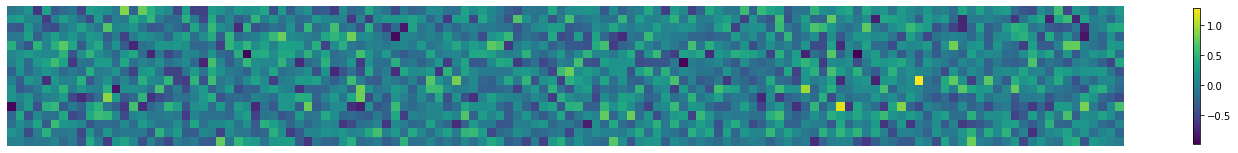

In [74]:
fig = plt.figure(figsize=(25, 5))
plt.imshow(model.omegas.T-0.1)
plt.colorbar(shrink=0.5) 
plt.axis('off')
plt.savefig('omegas.pdf')
plt.show() 

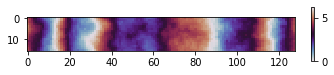

In [57]:
final = model.res[300].reshape((model.Lx, model.Ly))

plt.imshow(final.T %(2*np.pi), vmin=0, vmax=2*np.pi, cmap='twilight', interpolation='None')
plt.colorbar(shrink=0.25)
plt.show() 

In [61]:
# Reshape the result into 2D shape 
phase_evolution = model.res.reshape((model.n_frames, model.Lx, model.Ly))[::6]

# Set up figure plotting 
fig = plt.figure(figsize=(25, 5))
low, high = 0, 2*np.pi 

# Plot the movie one snapshot at a time 
ims = []
im = plt.imshow(phase_evolution[0].T, vmin=low, vmax=high, interpolation='none', animated=True, cmap='twilight')
# plt.title(r'$\sigma={}, \epsilon ={}, \eta ={}$'.format(sigma, epsilon, gamma))
plt.axis('off')
cbar = plt.colorbar(im, shrink=0.6)
cbar.set_ticks([0, 2*np.pi])
cbar.set_ticklabels([r'0', r'$2\pi$'])
plt.tight_layout()
for i in range(phase_evolution.shape[0]):
    xy = phase_evolution[i].T % (2*np.pi)
    im = plt.imshow(xy, vmin=low, vmax=high, interpolation='none', animated=True, cmap='twilight')
    plt.axis('off')
    ims.append([im])
ani = am.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)
mywriter = am.FFMpegWriter()
ani.save("movie.mp4", writer=mywriter)
plt.close()
